# Lab 2 - The Discrete Fourier Transform

Instructor: Prof. Lillian Jane Ratliff

Teaching Assistants: Ashwin Srinivas Badrinath and Kevin Lin

Team Members:

In [85]:
import numpy as np
import math
from math import *
import matplotlib
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
import cmath
%matplotlib inline

## 1) Complex Numbers and Complex Sinusoids

In [14]:
# writing the complex number as real + imaginary
z1 = 4+3j

# using the function complex
z2 =complex(4,3)
z3 = complex('4+3j')
print(z1)
print(z2)
print(z3)

# add the real part of 4+3j and the imaginary part of 
# 5+7j and display the result
z3=5+7j
result=complex(np.real(z1),np.imag(z3))
print(result)
# subtract the imaginary part of 4+3j from the real part of
# 5+7j and display the result
result=complex(np.real(z1),np.imag(z1)-np.real(z3))
print(result)

# multiply 4+3j and 4-3j and dislay the result
result=z1*z1.conjugate()
print(result)

# divide 7+5j and 7-5j and display the result
z4=7+5j
result=z4/z4.conjugate()
print(result)

(4+3j)
(4+3j)
(4+3j)
(4+7j)
(4-2j)
(25+0j)
(0.3243243243243243+0.9459459459459459j)


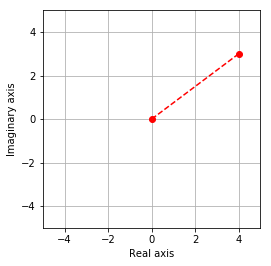

In [16]:
# define a complex number
z = 4+3j

# obtain the real and imaginary parts of the complex number
real = np.real(z)
imaginary = np.imag(z)

# plot the complex number on the complex plane
plt.plot((0,real),(0,imaginary),'ro--')

# some plotting touch-ups
plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid(True)
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

In [18]:
# compute the magnitude of the complex number using 
# Pythagorean theorem
mag1 = sqrt(real * real + imaginary * imaginary)
# or using abs
mag2 = np.abs(z)
# print out the magnitude of the complex number
print( 'The magnitude is',mag1,'or',mag2 )

# compute the angle of the complex number using trigonometry
phs1 = np.arctan(imaginary/real)
# or using the angle function
phs2 = np.angle(z)
# print out the phase of the complex number
print( 'The angle is', phs2,'or',phs1 )

The magnitude is 5.0 or 5.0
The angle is 0.6435011087932844 or 0.6435011087932844


[(6.123233995736766e-17-1j), (1+0j), (0.7071067811865476+0.7071067811865476j)]
[6.123233995736766e-17, 1.0, 0.7071067811865476]
[-1.0, 0.0, 0.7071067811865476]


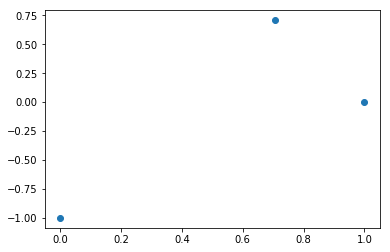

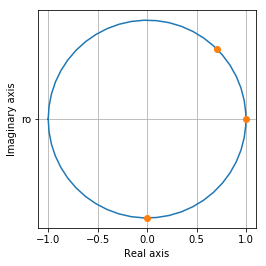

In [113]:
# [cos(k),sin(k)] is on the unit circle for any real k

# define k (possibly an array of angles)
k = [-np.pi/2,0,np.pi/4]

# Euler's notation

# Define the complex exponential here (possibly with a lambda
# expression)

im=0+1j

result = lambda x: np.exp(im*x)
euler=[]
eulerx=[]
eulery=[]

for i in k:
    euler.append(result(i))
    eulerx.append(np.real(result(i)))
    eulery.append(np.imag(result(i)))
   
    

#plot dot
print(euler)
print(eulerx)
print(eulery)
plt.figure(1)
plt.plot(eulerx,eulery,'o')


# draw unit circle for reference
plt.figure(2)

# some plotting touch-ups
t = np.linspace(-np.pi,np.pi)
plt.plot(np.cos(t),np.sin(t))

plt.axis('square')
plt.grid(True)
plt.plot(eulerx,eulery,'o','ro')
plt.xlabel('Real axis'), plt.ylabel('Imaginary axis')
plt.show()

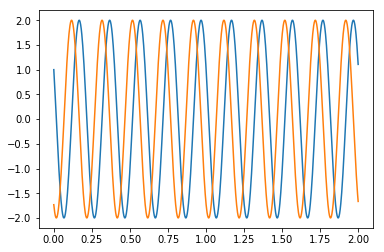

In [107]:
# complex sine waves
# Ae−j(2πf t+φ) which lasts for a
# duration of 2s and is sampled with fs = 500 samples per second.

# general simulation parameters
srate = 500 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # time in seconds

# sine wave parameters
freq = 5# frequency in Hz
ampl =2# amplitude in a.u.
phase =np.pi/3  # phase in radians

# generate the sine wave
csw = ampl*np.exp(-im*(2*np.pi*freq*time+phase))

# plot the results
plt.figure(3)
plt.plot(time,np.real(csw))
plt.plot(time,np.imag(csw))




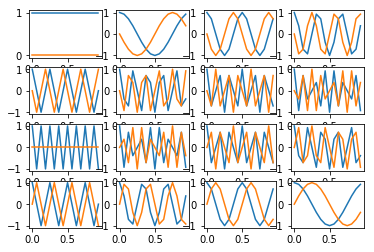

In [114]:
points = 16 # number of time points , sometimes denoted by N

# time vector to plot the basis
FourierTime = np.array(range(0,points))/points 
#0 to N-1
# the slowest frequency in an N point sinusoid in Hz
slowest =0  
# the fastest frequency in an N point sinusoid in Hz
fastest = 16

ampl=1

for fi in range(slowest,fastest):
    # create complex sine wave
#     csw = ampl*np.exp(-im*(2*np.pi*fi*time+phase)) 
    csw=result(-(2*np.pi*fi*FourierTime))
    # and plot it
    loc = np.unravel_index(fi,[4, 4],'F')
    plt.subplot2grid((4,4),(loc[1],loc[0]))
    plt.plot(FourierTime,np.real(csw))
    plt.plot(FourierTime,np.imag(csw))

plt.show()

## 2) Naive Computation of the DFT and IDFT from First Principles (Vector Form)

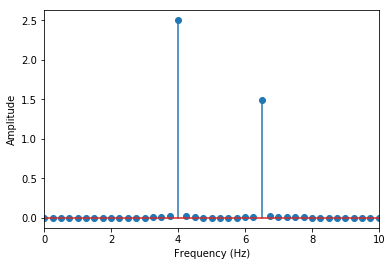

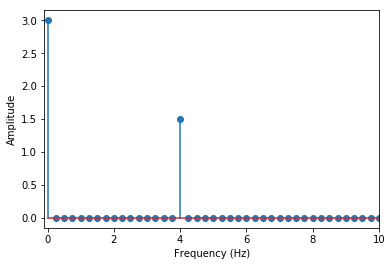

In [128]:
## The DFT in loop-form

# create the signal 1
t1=np.arange(0,4+1/1000,1/1000)


pnts1=len(t1)


signal1 =2.5*np.sin(2*np.pi*4*t1)+  1.5*np.sin(2*np.pi*6.5*t1)

# create the signal 2
t2=np.arange(0,4,1/1000)
pnts2=len(t2)
signal2 = 1.5*np.sin(2*np.pi*4*t2)+1.5

#k is fi
#fourtime1 is n/N time vector 

# prepare the Fourier transform for signal 1
fourTime1 = np.array(range(0,pnts1))/pnts1
fCoefs1  = np.zeros((len(signal1)),dtype=complex) 

# prepare the Fourier transform for signal 2
fourTime2 = np.array(range(0,pnts2))/pnts2
fCoefs2   = np.zeros(len(signal2),dtype=complex)

for fi in range(0,pnts1):
    
    # create complex sine wave
    csw1 = result(-(fi*2*np.pi*fourTime1))
    
    # compute dot product between sine wave and signal
    # these are called the Fourier coefficients
    fCoefs1[fi] = (1/pnts1)*np.dot(signal1,csw1)
    

for fi in range(0,pnts2):
    # create complex sine wave and compute dot product with signal
    csw2 = result(-(fi*2*np.pi*fourTime2))
    
    fCoefs2[fi] =(1/pnts2)*np.dot(signal2,csw2) 


# extract amplitudes for the spectrum of signal 1
ampls1 = 2*np.abs(fCoefs1)

# extract amplitudes for the spectrum of signal 2
ampls2 = 2*np.abs(fCoefs2);


# compute frequencies vector for the spectrum of signal 1
hz1 = np.linspace(0,500,num=math.floor(pnts1/2.)+1)

# compute frequencies vector for the spectrum of signal 2
hz2 = np.linspace(0,500,num=math.floor(pnts2/2.)+1)

fig1 = plt.figure(1)
plt.stem(hz1,ampls1[range(0,len(hz1))])
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.xlim(0,10)

fig2 = plt.figure(2)
plt.stem(hz2,ampls2[0:len(hz2)])
plt.xlim(-.1,10)
plt.xlabel('Frequency (Hz)'), plt.ylabel('Amplitude')
plt.show()

In [122]:
# IDFT (vector)

# initialize time-domain reconstruction for signal 1
reconSignal1 = np.zeros(len(t1))
# initialize time-domain reconstruction for signal 2
reconSignal2 = np.zeros(len(t2))

for fi in range(0,pnts1):
    
    # create coefficient-modulated complex sine wave
    inv_csw1 = 
    
    # sum them together
    reconSignal1 = 
    
for fi in range(0,pnts2):
    
    # create coefficient-modulated complex sine wave
    inv_csw2 = 
    
    # sum them together
    reconSignal2 = 

#plot the results for signal 1

 
#plot the results for signal 2


SyntaxError: invalid syntax (<ipython-input-122-90017d5f6e31>, line 4)

## 3) Naive Computation of the DFT and IDFT from First Principles (Matrix Form)

In [ ]:
def dft_matrix(N):
    # create a 1xN matrix containing indices 0 to N-1
    
    
    # take advantage of numpy broadcasting to create the matrix
    
    ## OR
    
    # use a nested for loop to populate an NxN matrix
    
    
    return W

In [ ]:
def dft(signal,N):
    
    # Obtain DFT matrix for signal 
    W = 
    # Find the DFT for signal
    X = 
    # return the DFT
    
    return X

In [ ]:
def dft_shift(X):
    N = int(len(X))
    if (# check if even):
        # even-length: return N+1 values
        
         # specify the range of frequency bins in the DFT
        n = 
        # create the shifted spectrum
        Y = 
        return n,Y
    else:
        # odd-length: return N values
        
        # specify the range of frequency bins in the DFT
        n = 
        # create the shifted spectrum
        Y = 
        
        return n,Y

In [ ]:
# test your shift function here

x = np.arange(0, 1.02, 0.02) - 0.5 # test signal
X = dft(x,len(x)) # obtain DFT of the test signal

fig_test=plt.figure(100)
fig_test.subplots_adjust(hspace=1, wspace=1, left = 0.1)
# plot the spectrum without shift
plt.subplot(2,1,1)
plt.stem(2*abs(X));
plt.title('Spectrum Without Shift')

n, y = dft_shift(X) # obtain shifted spectrum
# plot the shifted spectrum
plt.subplot(2,1,2)
plt.stem(n, 2*abs(y));
plt.title('Shifted Spectrum')

In [ ]:
def dft_map(X, Fs, shift):
    # define the resolution
    resolution =  
    
    if shift:
        # apply a shift if the condition is True
        
        # get both the frequency bins and the shifted spectrum
        n, Y =  
    else:
        Y =  # retain the original spectrum for no shift
        
        # the range of frequency bins is from 0 to 
        # the length of the signal for no shift
        n = 
        
    f =  # obtain frequency vector
    
    return f, Y

In [ ]:
# Find the DFT for signal 1
X1 = 
# obtain absolute value
absX1 = 2*abs(X1)
# plot the result


# Find the DFT for signal 2
X2 = 
# obtain absolute value
absX2 = 2*abs(X2)
# plot the result


In [ ]:
# IDFT (matrix)

# Obtain the DFT matrix
W1 = 
# inverse DFT fo signal 1
x_hat1 = 
# plot the result


# Obtain the DFT matrix
W2 = 
# inverse DFT for signal 2
x_hat2 = 
# plot the result



## 4) Numerical Precision Issues With the DFT and IDFT

In [ ]:
# define a discrete step function
def u(n):
    return ??

In [ ]:
N = 128 # define the number of points in the discrete time pulse
n =  # discrete time index values
pulse =  # obtain the discrete pulse
# plot the pulse


In [ ]:
P =  # obtain the DFT of the pulse using your DFT function

# plot the magnitude and phase of the pulse's spectrum


In [ ]:
# Obtain the DFT using scipy or numpy's fft function
P =  

# plot the magnitude and phase of the pulse's spectrum


In [ ]:
# Obtain the N point DFT matrix
W = 
# use the IDFT to obtain the reconstructed time-domain signal
x_hat =  

# plot the error (for both, imaginary and real parts) 
# between the original signal and the reconstructed signal


In [ ]:
# use the IDFT function in scipy or numpy
# to obtain the reconstructed time-domain signal
x_hat = 

# plot the error (for both, imaginary and real parts) 
# between the original signal and the reconstructed signal


## 5) Minimizing Energy Spread and Zero Padding

In [ ]:
def minimizeEnergySpreadDFT(x, fs, f1, f2):

    t1 =  # time period of the discrete time or sampled signal
    t2 =  # time period of the discrete time or sampled signal
    M =  # LCM of the two periods

    X =  # M point FFT of the signal
    
    # obtain the frequency mapping and shifted spectrum
    f,mX =  
    
    return mX,f

In [ ]:
#Define the sampling rate and the signal


# Plot the DFT after minimizing the energy spread or spectral
# leakage



# Plot the DFT before minimizing the energy spread or spectral
# leakage


In [ ]:
def optimalZeropad(x, fs, f):
  
    M =  # store the length of the signal
    
    # calculate the number of zeros to be padded
    period_samples = 
    fraction = 
    pad = 
    
    N =  # find the length of the signal after zero padding
    
    x =  # pad the signal with zeros
    
    X =  # obtain the DFT of the zero padded signal
    
    # obtain the frequency mapping and shifted spectrum
    f,mX =   
    
    return mX,f

In [ ]:
# Define the sampling rate and the signal


# Find DFT without zero padding and plot the result


# Find DFT after zero padding and plot the result
